a) Libraries you will need to access the dataset

In [ ]:
import numpy as np  #importing numpy for numpy_array
import pandas as pd  #Importing Pandas for reading CSV files
import matplotlib.pyplot as plt  #importing matplotlib for plotting graphs 
import seaborn as sns  #importing seaborn for plotting heatmap
from sklearn.model_selection import train_test_split  #importing sklearn for regression method
from sklearn import preprocessing
!pip install mlxtend --upgrade --no-deps
from sklearn.metrics import accuracy_score, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

     |████████████████████████████████| 1.4MB 4.8MB/s 
  Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive') 
df = pd.read_csv('/content/gdrive/MyDrive/Dataset1.csv')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AY0e-g55oAw2agMn4TK71rg0Gnb0Ha4CQllUWZTfQMQrGIOyTZvHFxRV4EM
Mounted at /content/gdrive


b)Summary of the dataset

In [ ]:
df.head()

,mcg,gvh,almScore,mitScore,PresenceOfHDEL,pox,vacScore,nucScore,Protien Localization
0,0.58,0.61,4.7,1.3,No,0.0,4.8,2.2,Mitochondrial
1,0.43,0.67,4.8,2.7,No,0.0,5.3,2.2,Mitochondrial
2,0.64,0.62,4.9,1.5,No,0.0,5.3,2.2,Mitochondrial
3,0.58,0.44,5.7,1.3,No,0.0,5.4,2.2,Nuclear
4,0.42,0.44,4.8,5.4,No,0.0,4.8,2.2,Mitochondrial


In [ ]:
print(df.keys())

Index(['mcg', 'gvh', 'almScore', 'mitScore', 'PresenceOfHDEL', 'pox',
       'vacScore', 'nucScore', 'Protien Localization'],
      dtype='object')


In [ ]:
print(df.describe())

               mcg          gvh  ...     vacScore     nucScore
count  1299.000000  1299.000000  ...  1299.000000  1299.000000
mean      0.472771     0.479569  ...     4.994226     2.803695
std       0.109463     0.105939  ...     0.570761     1.109756
min       0.110000     0.130000  ...     0.000000     0.000000
25%       0.400000     0.410000  ...     4.800000     2.200000
50%       0.470000     0.480000  ...     5.100000     2.200000
75%       0.550000     0.550000  ...     5.300000     3.100000
max       0.900000     1.000000  ...     7.300000    10.000000

[8 rows x 7 columns]


In [ ]:
print(df.dtypes)

mcg                     float64
gvh                     float64
almScore                float64
mitScore                float64
PresenceOfHDEL           object
pox                     float64
vacScore                float64
nucScore                float64
Protien Localization     object
dtype: object


Data distribution

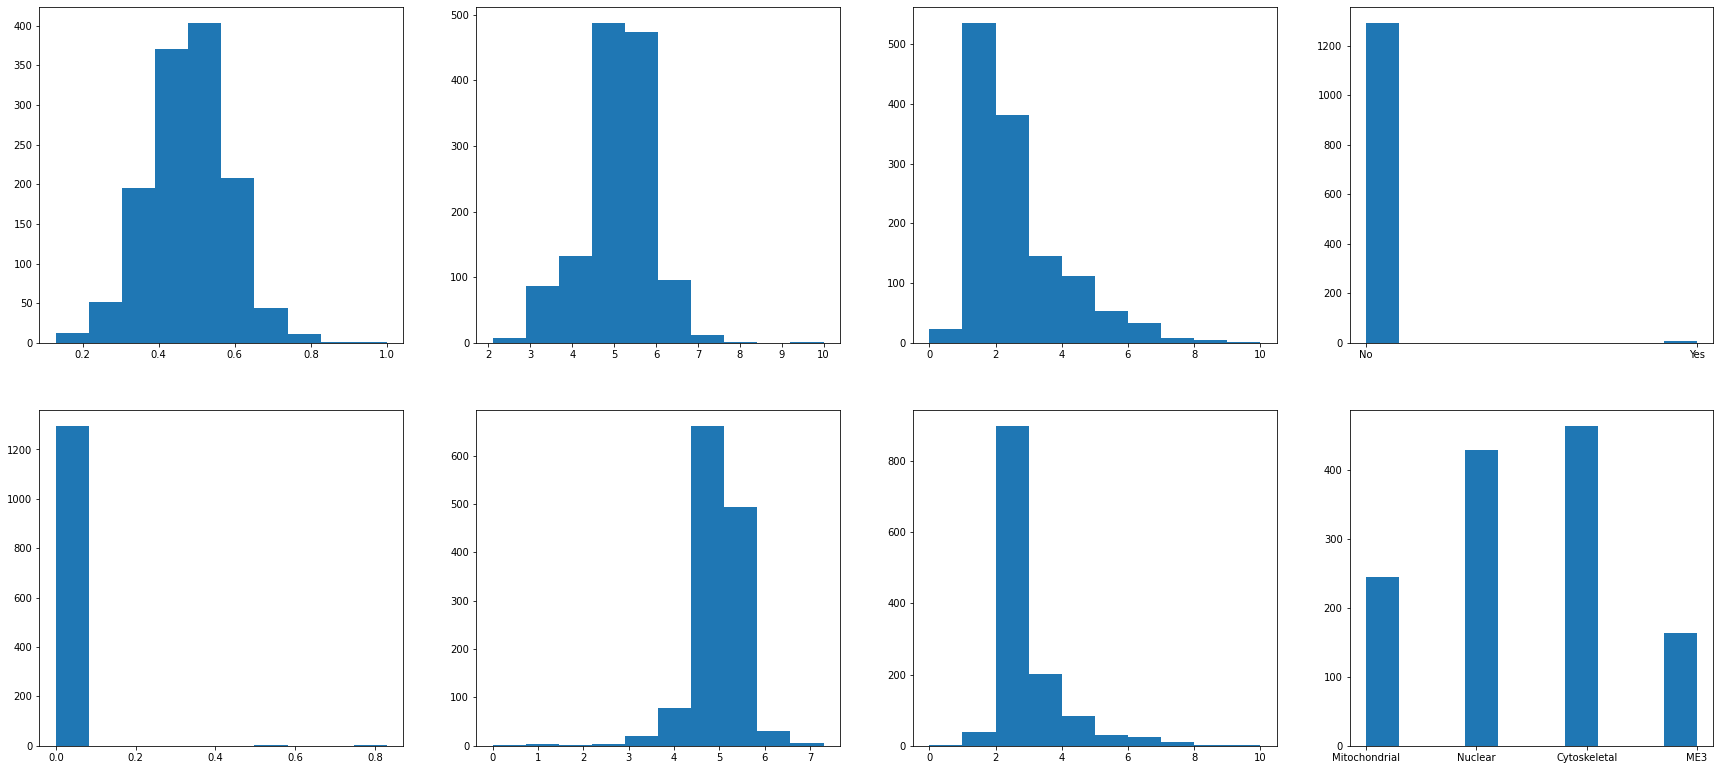

In [ ]:
plt.figure(figsize = [30, 21]) 
for i in range(1,df.shape[1]):
 column=df.columns[i]
 plt.subplot(3,4, i)
 plt.hist(df[column])

Class Distribution

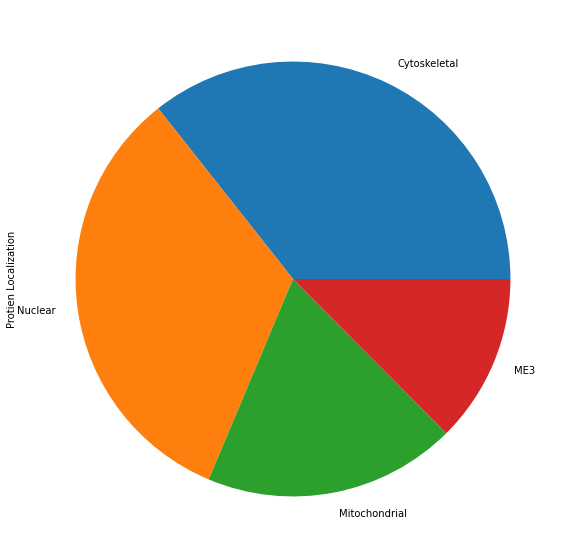

In [ ]:
protein_localization = df['Protien Localization'].value_counts().plot(kind='pie', figsize=(10, 10))

Categorical Attribute: Protien Localization

Continuous Atrribute: mcg,gvh,almScore,mitScore,vacScore,nuScore



Perform required preprocessing.

In [ ]:
new_df=df.drop(['PresenceOfHDEL','Protien Localization'],axis = 1)

In [ ]:
print('countable attributes')
print(new_df.shape[1])

countable attributes
7


In [ ]:
Mean_result=list()
for i in range(0,new_df.shape[1]):
 column=new_df.columns[i]
 Mean_result.append(new_df[column].mean())
print(Mean_result)


[0.4727713625866048, 0.4795688991531939, 5.085450346420332, 2.5911470361816806, 0.0020477290223248653, 4.994226327944569, 2.80369515011544]


In [ ]:
SD_result=list()
for i in range(0,new_df.shape[1]):
 column=new_df.columns[i]
 SD_result.append(new_df[column].std())
print(SD_result)

[0.10946298068637601, 0.10593904177792143, 0.8369155212982629, 1.3987194757127426, 0.037980136735418925, 0.5707607832486336, 1.109755821807907]


In [ ]:
sdf=new_df
for i in range(0,7):
 column=new_df.columns[i]
 sdf[column]=preprocessing.scale(new_df[column])
sdf

,mcg,gvh,almScore,mitScore,pox,vacScore,nucScore
0,0.979965,1.231664,-0.460738,-0.923448,-0.053937,-0.340425,-0.544199
1,-0.390889,1.798246,-0.341206,0.077853,-0.053937,0.535936,-0.544199
2,1.528307,1.326095,-0.221673,-0.780405,-0.053937,0.535936,-0.544199
3,0.979965,-0.373650,0.734586,-0.923448,-0.053937,0.711209,-0.544199
4,-0.482279,-0.373650,-0.341206,2.008934,-0.053937,-0.340425,-0.544199
...,...,...,...,...,...,...,...
1294,-0.847840,-1.506813,1.571313,1.079154,-0.053937,-1.041514,-1.535789
1295,-0.847840,-0.751371,1.810377,0.650025,-0.053937,-1.216786,-1.535789
1296,-0.025328,-0.468080,1.212715,1.007633,-0.053937,-0.340425,1.709417
1297,-0.390889,-0.751371,1.093183,-0.708883,-0.053937,0.535936,0.988260


In [ ]:
SMean_result=list()
for i in range(0,7):
 column=sdf.columns[i]
 SMean_result.append(round(sdf[column].mean()))
print(SMean_result)

[0, 0, 0, 0, 0, 0, 0]


In [ ]:
SSD_result=list()
for i in range(0,7):
 column=sdf.columns[i]
 SSD_result.append(round(sdf[column].std()))
print(SSD_result)

[1, 1, 1, 1, 1, 1, 1]


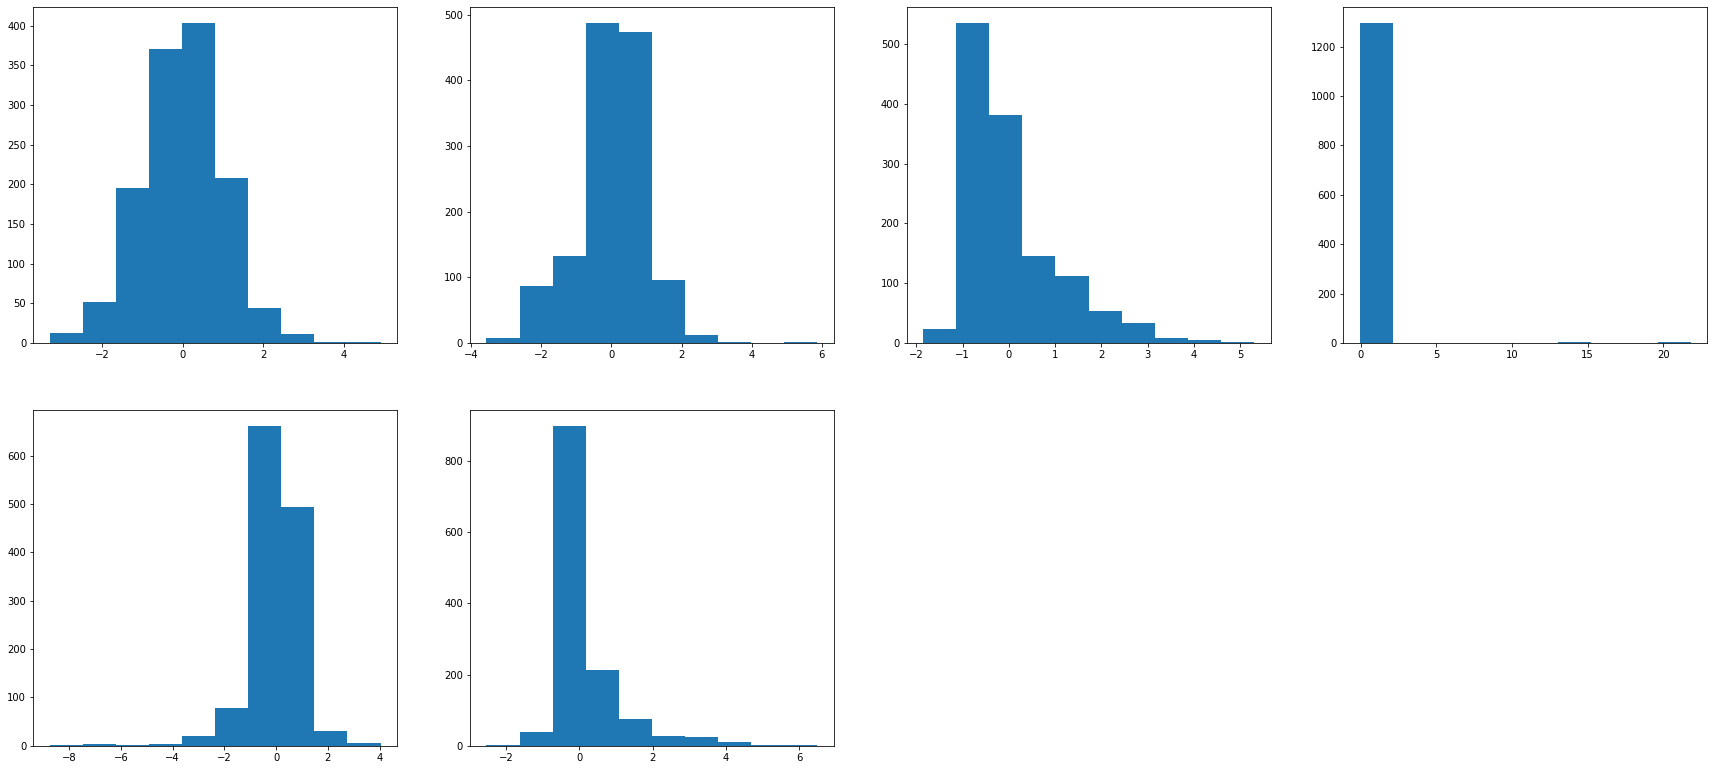

In [ ]:
plt.figure(figsize = [30, 21]) 
for i in range(1,sdf.shape[1]):
 column=sdf.columns[i]
 plt.subplot(3,4, i)
 plt.hist(sdf[column])

Split the data for training and testing purpose

In [ ]:
X=sdf.values[:,:-1]
Y=df['Protien Localization']

In [ ]:
print(X.shape)
print(Y.shape)

(1299, 6)
(1299,)


In [ ]:
classLabels=np.unique(Y)
classLabels

array(['Cytoskeletal', 'ME3', 'Mitochondrial', 'Nuclear'], dtype=object)

In [ ]:
# college roll number : 18/94072 -> even -> 80:20  testing=20%  training=80%
test_val = 0.20
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=test_val)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1039, 6)
(260, 6)
(1039,)
(260,)


KNN Classification

In [ ]:
# 9+4+0+7+2=22 -> k=5
acc =list()
clf = KNeighborsClassifier(n_neighbors=5)
clf=clf.fit(X_train,Y_train)
Y_pred=clf.predict(X_test)
a1=accuracy_score(Y_test,Y_pred)
print("Accuracy in KNN base classifier:")
print(a1)
acc.append(a1)
print("confusion matrix is:")
confuss_mat=confusion_matrix(Y_test,Y_pred)
print(confuss_mat)
print("classification report:")
clf_report=classification_report(Y_test, Y_pred, target_names=classLabels,output_dict=True)
print(clf_report)

Accuracy in KNN base classifier:
0.5269230769230769
confusion matrix is:
[[51  1  9 33]
 [ 3 26  2  4]
 [16  3 27 10]
 [33  2  7 33]]
classification report:
{'Cytoskeletal': {'precision': 0.49514563106796117, 'recall': 0.5425531914893617, 'f1-score': 0.5177664974619288, 'support': 94}, 'ME3': {'precision': 0.8125, 'recall': 0.7428571428571429, 'f1-score': 0.7761194029850748, 'support': 35}, 'Mitochondrial': {'precision': 0.6, 'recall': 0.48214285714285715, 'f1-score': 0.5346534653465347, 'support': 56}, 'Nuclear': {'precision': 0.4125, 'recall': 0.44, 'f1-score': 0.4258064516129032, 'support': 75}, 'accuracy': 0.5269230769230769, 'macro avg': {'precision': 0.5800364077669903, 'recall': 0.5518882978723404, 'f1-score': 0.5635864543516104, 'support': 260}, 'weighted avg': {'precision': 0.5366103435399552, 'recall': 0.5269230769230769, 'f1-score': 0.5296550299856638, 'support': 260}}


Apply Naive Bayes

In [ ]:
import warnings
warnings.filterwarnings('always')  

In [ ]:
clf = GaussianNB()
clf=clf.fit(X_train,Y_train)
Y_pred=clf.predict(X_test)
a2=accuracy_score(Y_test,Y_pred)
print("Accuracy in naive bayes base classifier:")
print(a2)
acc.append(a2)
print("confusion matrix is:")
confuss_mat=confusion_matrix(Y_test,Y_pred)
print(confuss_mat)
print("classification report:")
clf_report=classification_report(Y_test, Y_pred, target_names=classLabels,output_dict=True)
print(clf_report)

Accuracy in naive bayes base classifier:
0.3923076923076923
confusion matrix is:
[[ 0  2  0 92]
 [ 0 29  0  6]
 [ 0  3  1 52]
 [ 0  3  0 72]]
classification report:
{'Cytoskeletal': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 94}, 'ME3': {'precision': 0.7837837837837838, 'recall': 0.8285714285714286, 'f1-score': 0.8055555555555555, 'support': 35}, 'Mitochondrial': {'precision': 1.0, 'recall': 0.017857142857142856, 'f1-score': 0.03508771929824561, 'support': 56}, 'Nuclear': {'precision': 0.32432432432432434, 'recall': 0.96, 'f1-score': 0.4848484848484848, 'support': 75}, 'accuracy': 0.3923076923076923, 'macro avg': {'precision': 0.527027027027027, 'recall': 0.4516071428571429, 'f1-score': 0.3313729399255715, 'support': 260}, 'weighted avg': {'precision': 0.41444906444906443, 'recall': 0.3923076923076923, 'f1-score': 0.25585766572608676, 'support': 260}}


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Comparing accuracies

In [ ]:
acc

[0.5269230769230769, 0.3923076923076923]

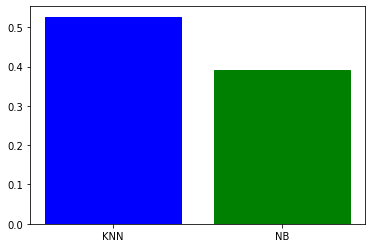

In [ ]:
l = ['KNN', 'NB']
barlist=plt.bar(l,acc)
barlist[0].set_color('b')
barlist[1].set_color('g')
plt.show()